In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [2]:
df = pd.read_csv('./classes.csv')

/var/folders/cj/11t2hzc55gjfmkwfwth0lkcc0000gn/T/ipykernel_61552/1475876956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


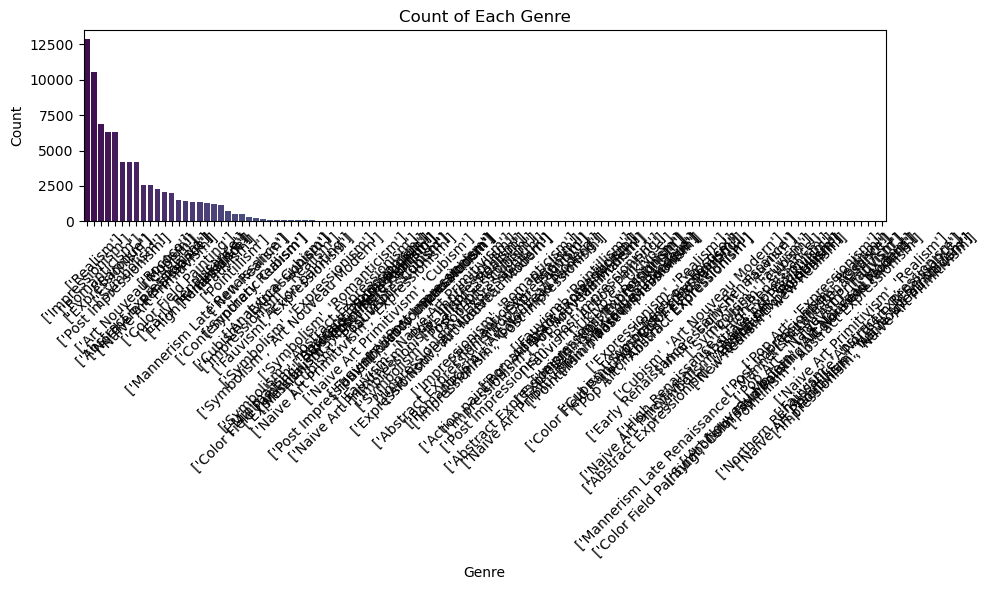

In [3]:
plt.figure(figsize=(10, 6))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

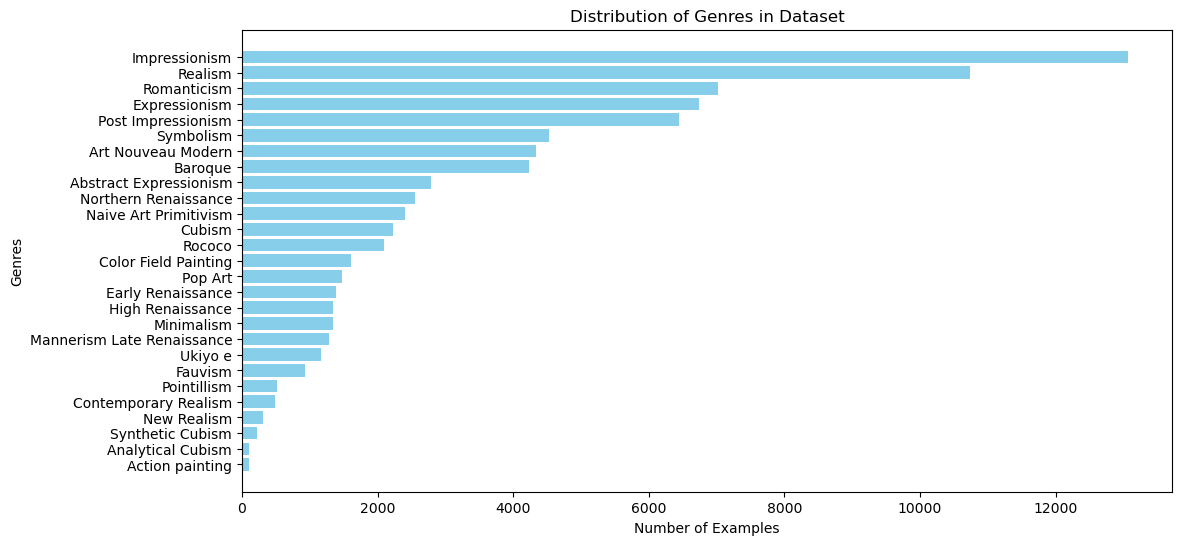

In [4]:
df['genre'] = df['genre'].apply(ast.literal_eval)
genre_counts = Counter([g for sublist in df['genre'] for g in sublist])
# Extract genres and counts from the Counter
genres, counts = zip(*genre_counts.most_common())  

plt.figure(figsize=(12, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel("Number of Examples")
plt.ylabel("Genres")
plt.title("Distribution of Genres in Dataset")
plt.gca().invert_yaxis()  # Highest count on top
plt.show()

/var/folders/cj/11t2hzc55gjfmkwfwth0lkcc0000gn/T/ipykernel_61552/3474235183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="magma")


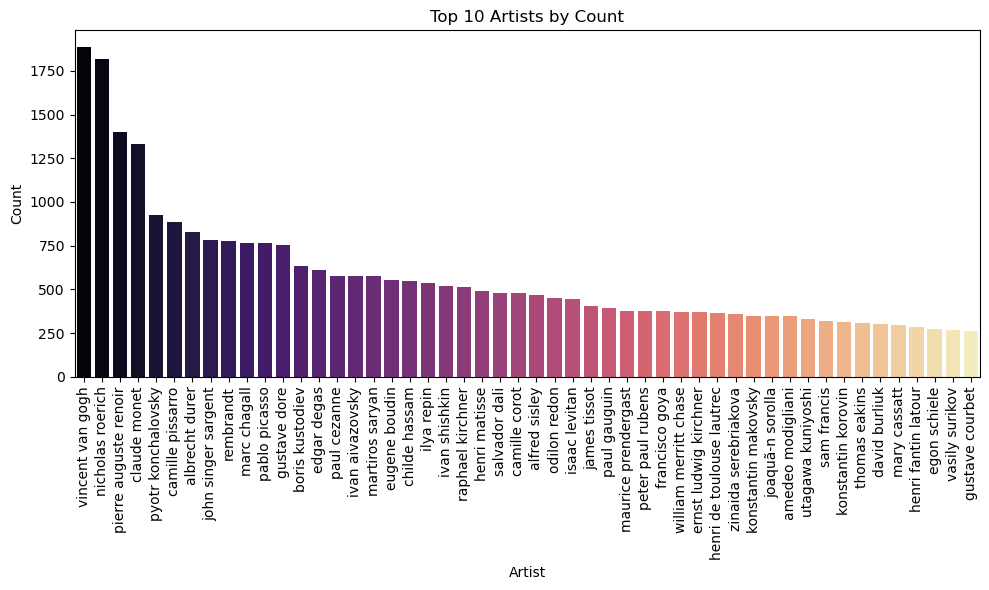

In [ ]:
plt.figure(figsize=(10, 6))
artist_counts = df['artist'].value_counts().head(50)
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="magma")
plt.title('Top Artists by Count')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
df[df['genre_count'] == 3]

,filename,artist,genre,description,phash,width,height,genre_count,subset
59574,Symbolism/ferdinand-hodler_the-day-1900.jpg,ferdinand hodler,"[Symbolism, Symbolism, Art Nouveau Modern]",the-day-1900,d5c42ff8c530d692,3069,1382,3,train
66275,Color_Field_Painting/barnett-newman_second-sta...,barnett newman,"[Color Field Painting, Color Field Painting, C...",second-station-1960,80454ab56bae6abd,1382,1837,3,test


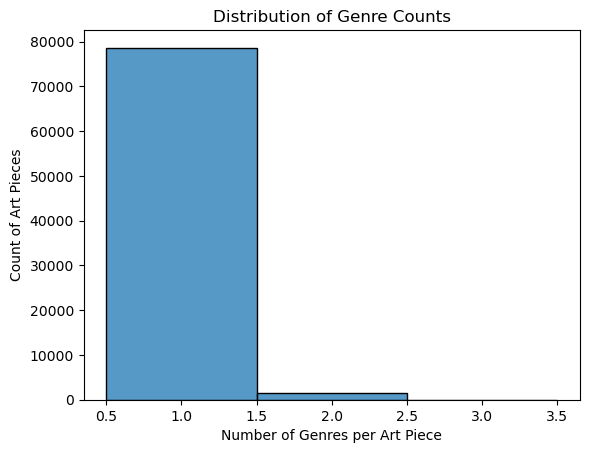

In [12]:
def plot_genre_count_distribution(df):
    #sns.histplot(df['genre_count'], bins=range(1, df['genre_count'].max()+2), discrete=True)
    sns.histplot(df['genre_count'], bins=3, discrete=True)
    plt.xlabel('Number of Genres per Art Piece')
    plt.ylabel('Count of Art Pieces')
    plt.title('Distribution of Genre Counts')
    plt.show()
plot_genre_count_distribution(df)

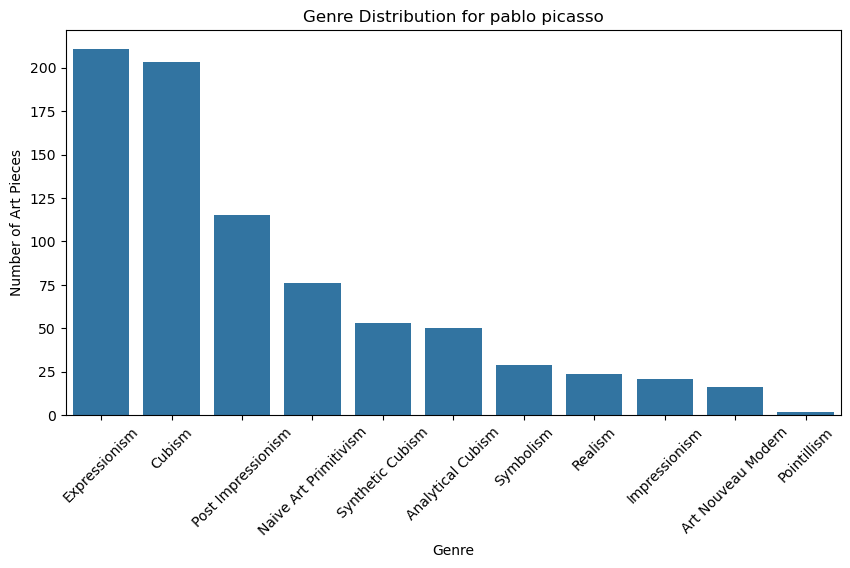

In [58]:
def plot_artist_genre_distribution(df, artist_name):
    artist_data = df[df['artist'] == artist_name].copy()
    
    if artist_data.empty:
        print(f"No data found for artist: {artist_name}")
        return
    
    # Ensure genre column contains lists and explode them
    artist_data['genre'] = artist_data['genre'].apply(lambda x: x if isinstance(x, list) else [x])
    artist_data = artist_data.explode('genre')

    genre_counts = artist_data['genre'].value_counts()

    plt.figure(figsize=(10,5))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.xlabel('Genre')
    plt.ylabel('Number of Art Pieces')
    plt.title(f'Genre Distribution for {artist_name}')
    plt.xticks(rotation=45)
    plt.show()
plot_artist_genre_distribution(df, "pablo picasso")

In [43]:
df["genre"]

0        [Abstract Expressionism]
1        [Abstract Expressionism]
2        [Abstract Expressionism]
3        [Abstract Expressionism]
4        [Abstract Expressionism]
                   ...           
80037             [Impressionism]
80038          [High Renaissance]
80039          [High Renaissance]
80040          [High Renaissance]
80041          [High Renaissance]
Name: genre, Length: 80042, dtype: object

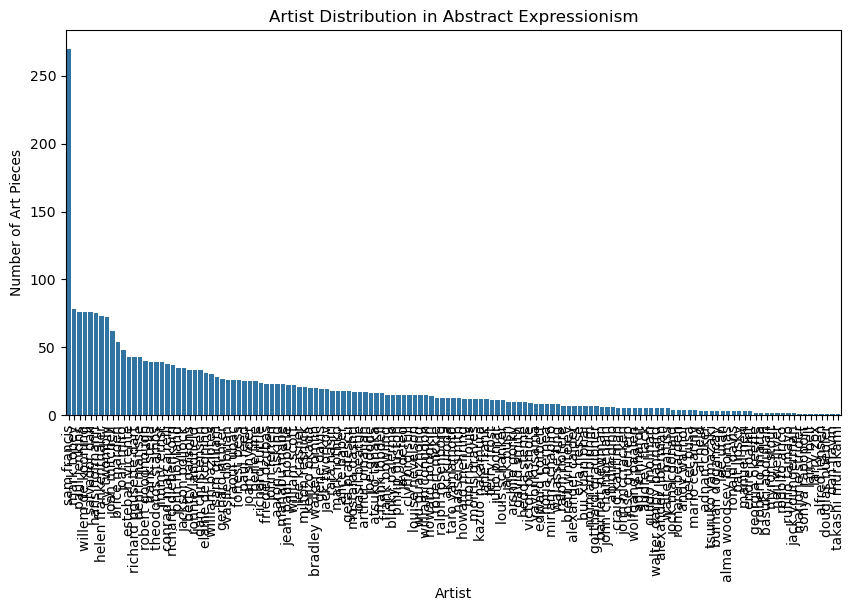

In [59]:
def plot_genre_artist_distribution(df, genre_name):
    # Convert genre column from string to list
    df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Explode so each genre gets its own row
    df_exploded = df.explode('genre')
    
    # Filter for the given genre
    genre_data = df_exploded[df_exploded['genre'] == genre_name]
    
    if genre_data.empty:
        print(f"No data found for genre: {genre_name}")
        return
    
    # Count artists
    artist_counts = genre_data['artist'].value_counts()
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=artist_counts.index, y=artist_counts.values)
    plt.xlabel('Artist')
    plt.ylabel('Number of Art Pieces')
    plt.title(f'Artist Distribution in {genre_name}')
    plt.xticks(rotation=90)
    plt.show()

# Example usage
plot_genre_artist_distribution(df, "Abstract Expressionism")


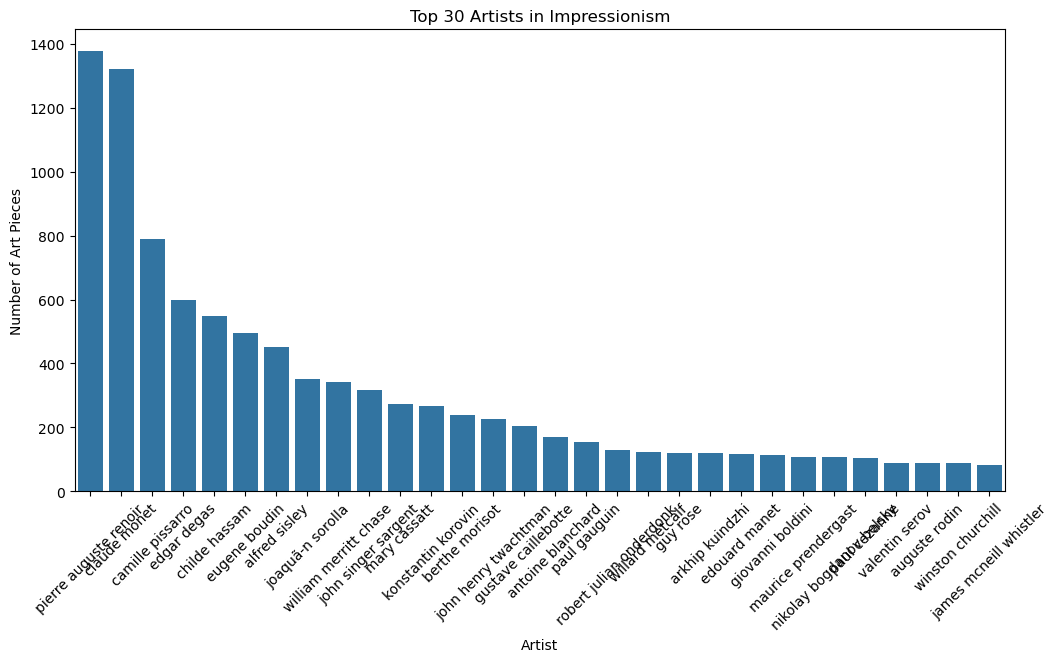

In [61]:
def plot_genre_artist_distribution_n(df, genre_name, top_n=30):
    # Convert genre column from string to list
    df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Explode so each genre gets its own row
    df_exploded = df.explode('genre')
    
    # Filter for the given genre
    genre_data = df_exploded[df_exploded['genre'] == genre_name]
    
    if genre_data.empty:
        print(f"No data found for genre: {genre_name}")
        return
    
    # Count artists and select the top N
    artist_counts = genre_data['artist'].value_counts().head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=artist_counts.index, y=artist_counts.values)
    plt.xlabel('Artist')
    plt.ylabel('Number of Art Pieces')
    plt.title(f'Top {top_n} Artists in {genre_name}')
    plt.xticks(rotation=45)
    plt.show()

# Example usage: plot only the top 30 artists for "Abstract Expressionism"
plot_genre_artist_distribution_n(df, "Impressionism", top_n=30)

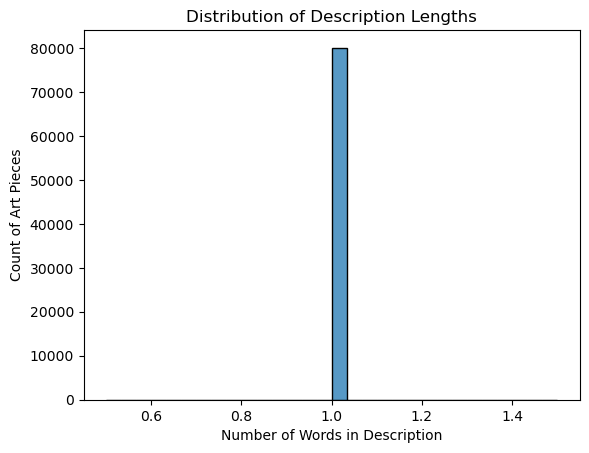

In [45]:
def plot_description_length_distribution(df):
    df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))
    sns.histplot(df['description_length'], bins=30)
    plt.xlabel('Number of Words in Description')
    plt.ylabel('Count of Art Pieces')
    plt.title('Distribution of Description Lengths')
    plt.show()
plot_description_length_distribution(df)

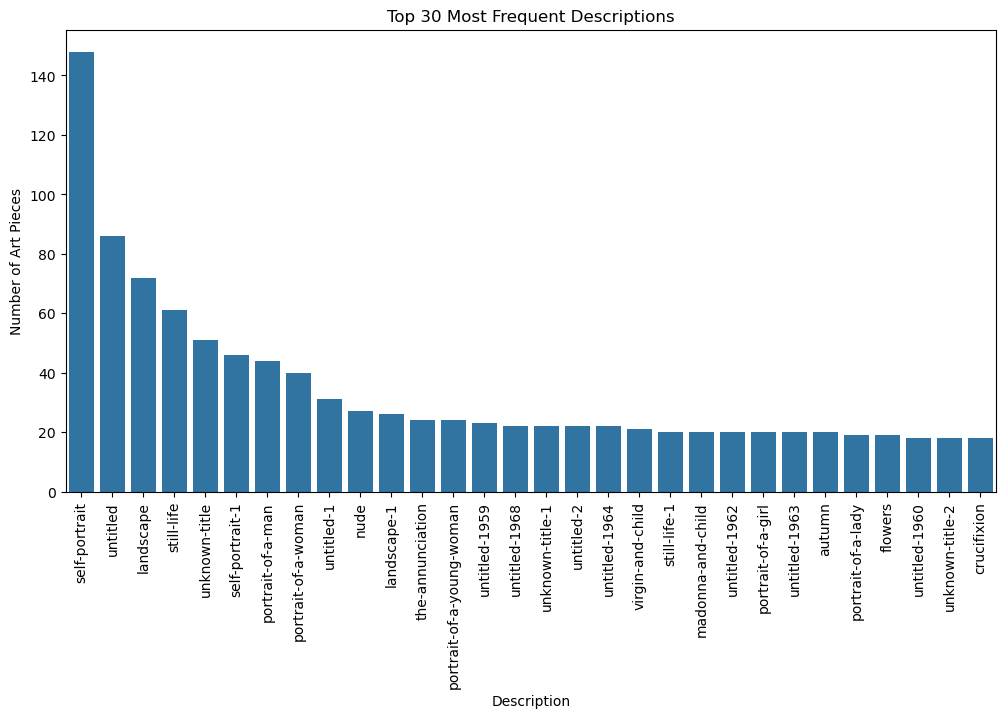

In [54]:
def plot_description_frequency(df, top_n=30):
    # Count occurrences of each description
    description_counts = df['description'].value_counts().head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=description_counts.index, y=description_counts.values)
    plt.xlabel('Description')
    plt.ylabel('Number of Art Pieces')
    plt.title(f'Top {top_n} Most Frequent Descriptions')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

# Example usage: Plot top 30 most frequent descriptions
plot_description_frequency(df, top_n=30)


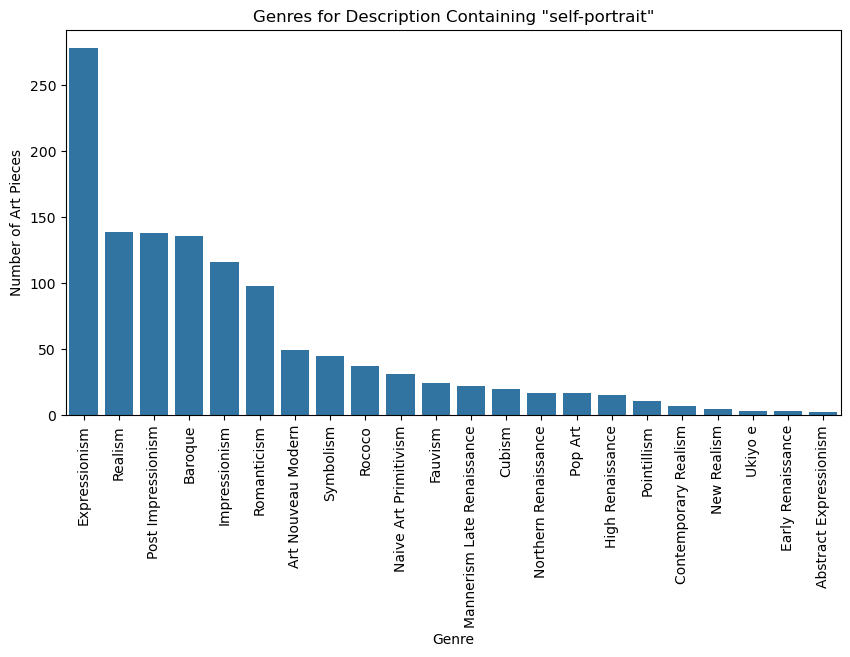

In [48]:
def plot_genres_by_description(df, description_text):
    matching_data = df[df['description'].str.contains(description_text, case=False, na=False)].copy()
    matching_data['genre'] = matching_data['genre'].apply(lambda x: x if isinstance(x, list) else [x])
    matching_data = matching_data.explode("genre")
    genre_counts = matching_data['genre'].value_counts()
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.xlabel('Genre')
    plt.ylabel('Number of Art Pieces')
    plt.title(f'Genres for Description Containing "{description_text}"')
    plt.xticks(rotation=90)
    plt.show()
plot_genres_by_description(df, "self-portrait")


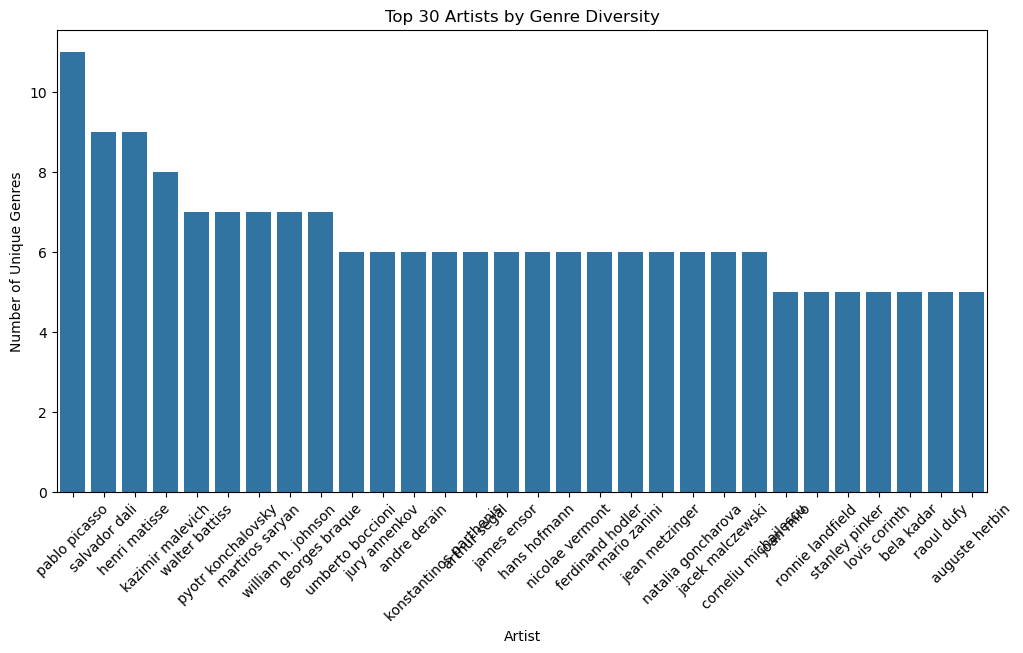

In [55]:
def plot_artist_genre_diversity(df, top_n=30):
    # Convert genre column from string to list
    df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Explode so each genre gets its own row
    df_exploded = df.explode('genre')
    
    # Count unique genres per artist
    artist_genre_counts = df_exploded.groupby('artist')['genre'].nunique().sort_values(ascending=False).head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values)
    plt.xlabel('Artist')
    plt.ylabel('Number of Unique Genres')
    plt.title(f'Top {top_n} Artists by Genre Diversity')
    plt.xticks(rotation=45)
    plt.show()

# Example usage: Plot top 30 artists by genre diversity
plot_artist_genre_diversity(df, top_n=30)